# Maestría en Ciencia de Datos e Inteligencia Artificial
## Módulo: 09: Minería de Datos
### 2025

### *Msc Renzo Claure*
---

#### *Diferencias de Layers en Matplotlib*

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns


**Pyplot**

In [2]:
import matplotlib.pyplot as plt

Hijos (Artists) de la figura (Pyplot):
Rectangle(xy=(0, 0), width=1, height=1, angle=0)
Axes(0.125,0.11;0.775x0.77)


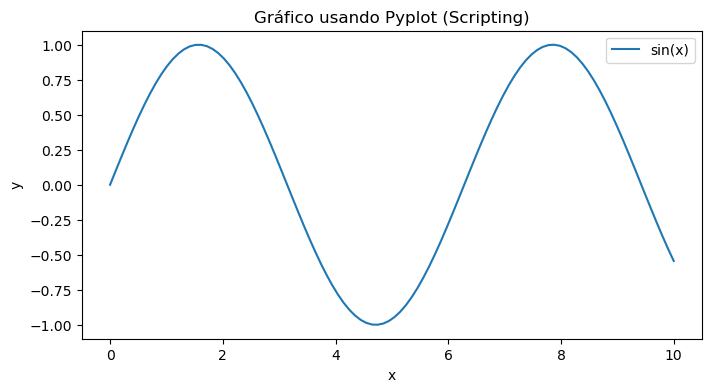

In [3]:
# Datos de ejemplo
x = np.linspace(0, 10, 100)
y = np.sin(x)

# --- Scripting con pyplot ---
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='sin(x)')
plt.title("Gráfico usando Pyplot (Scripting)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Obtener la figura actual (stateful) y listar sus hijos (Artists)
fig = plt.gcf()  # get current figure
print("Hijos (Artists) de la figura (Pyplot):")
for child in fig.get_children():
    print(child)

plt.show()
# Con plt.figure() y plt.plot(), la interfaz de pyplot crea y maneja internamente 
# la figura y los ejes. 
# Luego, con fig.get_children() se accede a todos los objetos Artist que componen la figura.

#### *Artist*

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x = np.linspace(0, 10, 100)
y = np.sin(x)

# --- Uso de la API orientada a objetos ---
fig, ax = plt.subplots(figsize=(8, 4))
# ax.plot devuelve una lista de objetos Line2D
line, = ax.plot(x, y, label='sin(x)')
ax.set_title("Gráfico usando API Orientada a Objetos (Artist)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

# Acceso y modificación del objeto 'line' (un Artist específico)
print("Tipo del objeto 'line':", type(line))
print("Grosor de línea inicial:", line.get_linewidth())
line.set_linewidth(3.0)
print("Nuevo grosor de línea:", line.get_linewidth())

plt.show()


**Comparación y Conclusiones**  
*Scripting (Pyplot):*

Ventajas: Rapidez y facilidad de uso, ideal para prototipos y análisis exploratorios.
Limitación: Menor control sobre los detalles de los objetos gráficos, ya que se maneja de forma implícita.

*API Orientada a Objetos (Artist):*

Ventajas: Control total sobre cada elemento de la visualización. Es ideal para aplicaciones complejas o cuando se requiere personalización avanzada.
Desventaja: Requiere más código y una comprensión más profunda de la estructura interna de Matplotlib.

### *Seaborn y PLotly*

In [ ]:

# Cargamos el dataset Iris desde Seaborn
iris = sns.load_dataset('iris')


In [ ]:
iris.head()

#### *Seaborn*

In [ ]:
# Visualización: Histograma de la longitud del sépalo con distribución de densidad
plt.figure(figsize=(8, 5))
sns.histplot(iris['sepal_length'], bins=20, kde=True)
plt.title("Histograma de la longitud del sépalo")
plt.xlabel("Longitud del sépalo")
plt.ylabel("Frecuencia")
plt.show()


In [ ]:
# Visualización: Gráfico de dispersión de longitud vs ancho del sépalo, diferenciando especies
plt.figure(figsize=(8, 5))
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', palette='deep')
plt.title("Dispersión: Longitud vs Ancho del Sépalo")
plt.xlabel("Longitud del sépalo")
plt.ylabel("Ancho del sépalo")
plt.legend(title="Especie")
plt.show()


#### *PLotly*

In [ ]:
import plotly.express as px

# Usamos el mismo dataset Iris
fig = px.scatter(iris, x='sepal_length', y='sepal_width', color='species',
                 title='Visualización interactiva: Longitud vs Ancho del Sépalo')
fig.show()


#### *Altair*

In [ ]:
import altair as alt
import seaborn as sns
import pandas as pd

iris = sns.load_dataset('iris')

chart = alt.Chart(iris).mark_circle().encode(
    x='sepal_length',
    y='sepal_width',
    color='species'
).properties(title="Scatter plot con Altair")

chart


### *Graficos 3D*

In [ ]:
mammoth = pd.read_csv('mammoth_a.csv')
mammoth2 = mammoth.sample(50000)

In [ ]:
#plot the mammoth
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(90,72))

ax = fig.add_subplot(111, projection='3d')
# ax.set_aspect('equal')
ax.set_title('Mammoth 3D en Matplot')
ax.set_axis_off()
ax.scatter(mammoth['x'], mammoth['y'], mammoth['z'], s=20,c='black')
ax.view_init(0, -170)

plt.show()

#### *Ejemplo : Reducción de Dimensionalidad con PCA y Visualización de Clusters*
Este ejemplo demuestra cómo aplicar PCA para reducir las dimensiones de un conjunto de datos y visualizar la proyección en dos dimensiones.

In [ ]:
from sklearn.decomposition import PCA

# Seleccionar las características numéricas del dataset
features = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)
iris['pca_one'] = pca_result[:, 0]
iris['pca_two'] = pca_result[:, 1]

# Visualización de los resultados de PCA
plt.figure(figsize=(8, 5))
sns.scatterplot(data=iris, x='pca_one', y='pca_two', hue='species', palette='viridis')
plt.title("PCA: Visualización en 2D del dataset Iris")
plt.xlabel("Primer componente PCA")
plt.ylabel("Segundo componente PCA")
plt.show()


#### *Ejemplo: Clustering con KMeans y Visualización*
En este código se aplica el algoritmo KMeans para agrupar los datos del dataset Iris y se visualizan los clusters en el espacio reducido por PCA.


In [ ]:
from sklearn.cluster import KMeans

# Número de clusters (en Iris se suelen manejar 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
iris['cluster'] = kmeans.fit_predict(features)

# Visualización de los clusters utilizando los componentes obtenidos por PCA
plt.figure(figsize=(8, 5))
sns.scatterplot(data=iris, x='pca_one', y='pca_two', hue='cluster', palette='Set1', style=iris['species'])
plt.title("Clusters generados por KMeans (usando PCA)")
plt.xlabel("Primer componente PCA")
plt.ylabel("Segundo componente PCA")
plt.legend(title="Cluster")
plt.show()


#### *Ejemplo: Detección de Outliers con Isolation Forest*
Se utiliza Isolation Forest para identificar puntos anómalos en el dataset y se visualizan en la proyección PCA.

In [ ]:
from sklearn.ensemble import IsolationForest

# Aplicar Isolation Forest para detectar outliers (configuramos un 5% de contaminación)
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iris['anomaly'] = iso_forest.fit_predict(features)

# Visualización: marcar los outliers en rojo y los datos normales en azul
plt.figure(figsize=(8, 5))
sns.scatterplot(data=iris[iris['anomaly'] == 1], x='pca_one', y='pca_two', color='blue', label='Normal')
sns.scatterplot(data=iris[iris['anomaly'] == -1], x='pca_one', y='pca_two', color='red', label='Outlier')
plt.title("Detección de Outliers con Isolation Forest")
plt.xlabel("Primer componente PCA")
plt.ylabel("Segundo componente PCA")
plt.legend()
plt.show()


#### *Ejemplo de Dasboard*